In [142]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline

In [143]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
example = pd.read_csv('gender_submission.csv')

In [144]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [145]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Cleaning

We'll clean x_test and x_train at the same time.

Columns to be dropped: `Ticket`, `Cabin`, `Embarked`, `Name`.

In [162]:
train_clean = train.copy()
test_clean = test.copy()

In [163]:
train_clean = train_clean.drop(labels=['Cabin', 'Embarked', 'Ticket', 'Name'], axis=1)
test_clean = test_clean.drop(labels=['Cabin', 'Embarked', 'Ticket', 'Name'], axis=1)

Now let's convert male to 0 and female to 1.

In [164]:
train_clean = train_clean.replace(['male', 'female'], [0, 1])
test_clean = test_clean.replace(['male', 'female'], [0, 1])

In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [170]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
dtypes: float64(2), int64(5)
memory usage: 22.9 KB


We need to fill the `NaN` under `Age` before we can do any modeling. We'll use `sklearn.preprocessing.Imputer()` to do so.

In [177]:
imp = sklearn.preprocessing.Imputer(missing_values = 'NaN', strategy='median', axis=0)

In [186]:
train['Age'] = imp.fit_transform(train[['Age']]).ravel()

In [187]:
test['Age'] = imp.fit_transform(test[['Age']]).ravel()

`test` has one null value under `Fare`. We'll fill that with the median value under Fare.

In [198]:
# Find the index of the null value. We need to use .iloc to set the value rather than chain indexing.
test[test['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
152,1044,3,0,60.5,0,0,NaN


In [199]:
test.iloc[152, 6] = test.Fare.median()

Reassign `train` and `test` to their clean counterparts.

In [203]:
train = train_clean
test = test_clean

Split in to `x` and `y` to signify endogenous and exogenous variables respectively.

In [204]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.5,0,0,7.8292
1,893,3,1,47.0,1,0,7.0000
2,894,2,0,62.0,0,0,9.6875
3,895,3,0,27.0,0,0,8.6625
4,896,3,1,22.0,1,1,12.2875


In [205]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [206]:
x_test = test.iloc[:, 1:]
x_train = train.iloc[:, 2:]

In [224]:
y_train = train.iloc[:, 1]

In [229]:
!ls

gender_submission.csv rfc_predict.csv       train.csv
knn_predict.csv       test.csv
predictions.csv       titanic.ipynb


Grab the correct data to score our predictions.

In [230]:
y_test = pd.read_csv('gender_submission.csv')

In [232]:
y_test = y_test.drop(labels=['PassengerId'], axis=1)

## Plotting

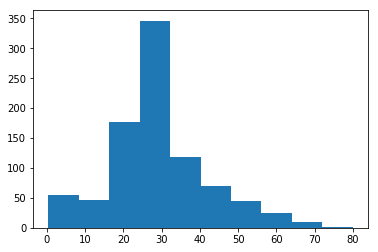

In [209]:
plt.hist(x_train.Age);

# Testing space

In [216]:
len(x_train)

891

In [217]:
len(y_train)

891

In [221]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [222]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


In [225]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Logistic regression

In [226]:
from sklearn.linear_model import LogisticRegression

In [227]:
logmodel = LogisticRegression()

Now train the model using our training data.

In [228]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Make predictions using the trained model.

In [236]:
predictions = logmodel.predict(x_test)

In [237]:
p = pd.DataFrame(data={'PassengerId': test['PassengerId'], 'Survived': predictions})

In [238]:
p.to_csv('predictions.csv', index=False)

In [239]:
p.Survived.mean()

0.3684210526315789

## Let's give KNN a try.

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [247]:
knn_model = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree', metric='minkowski')

In [248]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [249]:
knn_predictions = knn_model.predict(x_test)

In [250]:
knn_df = pd.DataFrame(data={'PassengerId': test['PassengerId'], 'Survived': knn_predictions})

In [251]:
knn_df.to_csv('knn_predict.csv', index=False)

In [252]:
knn_df.Survived.mean()

0.47607655502392343

In [69]:
knn_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Let's try random forest

In [253]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [255]:
rfc_predictions = rfc.predict(x_test)

In [256]:
rfc_df = pd.DataFrame(data={'PassengerId': test.PassengerId, 'Survived': rfc_predictions})

In [257]:
rfc_df.to_csv('rfc_predict.csv', index=False)

In [258]:
rfc_df.Survived.mean()

0.3803827751196172